# Read file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
path = 'data_V5.csv'

In [98]:
df = pd.read_csv(path, sep=',', encoding='ISO-8859-1')

In [99]:
df.head()

,date,recipe_id,country,region,city,categories,day,hour,season
0,29.07.2013 21:14,136996.0,DE,16.0,Berlin,"['Braten (Fleisch)', 'Fleisch', 'Milchprodukte...",29/07/2013,21:14,summer
1,29.07.2013 21:14,255239.0,DE,2.0,Munich,"['Asien', 'Japan', 'Suppen/Eintoepfe', 'Vorspe...",29/07/2013,21:14,summer
2,29.07.2013 21:14,447948.0,DE,16.0,Berlin,"['kalt', 'glutenfrei', 'laktosefrei', 'ohne We...",29/07/2013,21:14,summer
3,29.07.2013 21:14,131582.0,DE,16.0,Berlin,"['glutenfrei', 'laktosefrei', 'ohne Weizen']",29/07/2013,21:14,summer
4,29.07.2013 21:15,35361.0,DE,16.0,Berlin,"['trocknen', 'Gesund und Diaet', 'laktosefrei'...",29/07/2013,21:15,summer


# Count categories

In [133]:
def get_categories_counter(categories_column):
    """ nan_indexes are not indexes from df/series but normal indexes"""
    
    import math
    from tqdm import tqdm
    
    result = dict()
    nan_indexes = list()
    i = 0
    with tqdm(total=len(categories_column)) as pbar:
        for categories in categories_column:
            i += 1
            if (type(categories)) == str:
                categories = categories.replace('[','').replace(']','').replace("'","").replace(', ',',').lower()

                for category in categories.split(','):
                    if result.get(category) != None:
                        result[category] += 1
                    else:
                        result[category] = 1
            else:
                nan_indexes += [i]
                if result.get('nan') != None: #todo
                    result['nan'] += 1
                else:
                    result['nan'] = 1
            
            pbar.update(1)
           
    return result, nan_indexes

In [210]:
categories_counter, nan_indexes = get_categories_counter(df.categories)

100%|██████████| 1576832/1576832 [00:16<00:00, 94989.14it/s] 


In [211]:
print('Number of nan values in the dataset:', len(nan_indexes), 
      '. It is ', np.round(len(nan_indexes)/ len(df) * 100, 2),'% from the whole dataset.')

Number of nan values in the dataset: 350840 . It is  22.25 % from the whole dataset.


In [137]:
print('We have ', len(df) - len(nan_indexes), ' examples left.')

We have  1225992  examples left.


# Plot data

In [105]:
import operator

In [138]:
sorted_desc = dict( sorted(categories_counter.items(), key=operator.itemgetter(1),reverse=True))

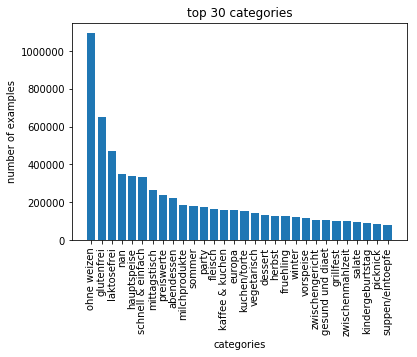

In [139]:
# take only n top results
n = 30
n_keys = list(sorted_desc.keys())[:n]
n_values = [v for k, v in list(sorted_desc.items())[:n]]

plt.bar(range(n), n_values)
plt.ylabel('number of examples')
plt.title('top '+str(n)+' categories')
plt.xlabel('categories')
plt.xticks(range(n), n_keys, rotation='vertical')
plt.show()

## Group data by season

In [177]:
df_by_season = df.groupby('season')

categories_season = dict()
for name, group in df_by_season:
    print(name)
    print(len(group))
    #print(group.index)
    categories_season[name], nan_list = get_categories_counter(group.categories)
    print('Number of nan elements:', len(nan_list), '(', np.round(len(nan_list)/len(group)*100, 2),'%)')
    print('We have ', categories_season[name][''], '(', np.round(categories_season[name]['']/len(group)*100, 2),'%)' , 'empty categories.')

summer
913359


100%|██████████| 913359/913359 [00:10<00:00, 86993.76it/s] 


Number of nan elements: 226663 ( 24.82 %)
We have  36954 ( 4.05 %) empty categories.
winter
663473


100%|██████████| 663473/663473 [00:07<00:00, 90150.12it/s] 


Number of nan elements: 124177 ( 18.72 %)
We have  25664 ( 3.87 %) empty categories.


In [178]:
categories_season

{'summer': {'braten (fleisch)': 27119,
  'fleisch': 75966,
  'milchprodukte': 105257,
  'mittagstisch': 130650,
  'ostern': 25752,
  'date': 44281,
  'fruehling': 77160,
  'sommer': 121505,
  'hauptspeise': 159749,
  'gesund und diaet': 61537,
  'fettarm': 10545,
  'kalorienarm': 7702,
  'low fat ??': 1984,
  'trennkost': 1458,
  'kohlenhydratarm': 5248,
  'party': 108279,
  'preiswerte': 136922,
  'schnell & einfach': 195862,
  'studentenkueche': 32736,
  'diabetiker': 6110,
  'auflauf /ueberbackenes': 35360,
  'glutenfrei': 379465,
  'ohne weizen': 631088,
  'asien': 20699,
  'japan': 1043,
  'suppen/eintoepfe': 33735,
  'vorspeise': 64816,
  'zwischengericht': 61478,
  'vegetarisch': 86218,
  'laktosefrei': 279022,
  'kalt': 45670,
  'trocknen': 1036,
  'europa': 91469,
  'kuchen/torte': 97710,
  'kaffee & kuchen': 99248,
  'dessert': 82772,
  'pfannkuchen/crepe': 12235,
  'fruehstueck': 35276,
  'zwischenmahlzeit': 58582,
  'abendessen': 114831,
  'kindergeburtstag': 54165,
  'west

## Delete nan and empty values from dict
We don't want these values on charts

In [179]:
del(categories_season['winter']['nan'])
del(categories_season['summer']['nan'])

In [180]:
del(categories_season['winter'][''])
del(categories_season['summer'][''])

# Plot by season

In [142]:
import plotly 
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go

In [ ]:
with open('plotly_config.txt') as file:
    content = file.read()
    
username, api_key = content.split(';')
print('usename:', username, '\napi_key:', api_key)

In [143]:
plotly.tools.set_credentials_file(username=username, api_key=api_key)

In [208]:
# both seasons
labels = list(categories_season.keys())

sorted_desc = dict(sorted(categories_season[labels[0]].items(), key=operator.itemgetter(1),reverse=True))
n_keys = list(sorted_desc.keys())[:n]
n_values = [v for k, v in list(sorted_desc.items())[:n]]

trace1 = go.Bar(x=n_keys, y=n_values)

sorted_desc = dict(sorted(categories_season[labels[1]].items(), key=operator.itemgetter(1),reverse=True))
n_keys = list(sorted_desc.keys())[:n]
n_values = [v for k, v in list(sorted_desc.items())[:n]]

trace2 = go.Bar(x=n_keys, y=n_values)

fig = tools.make_subplots(rows=2, cols=1, subplot_titles=(labels[0], labels[1]))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=600, width=600, title='Top ' + str(n) + ' categories')

py.iplot(fig, filename='all_cities_both_seasons')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



In [184]:
# summer
sorted_desc = dict(sorted(categories_season['summer'].items(), key=operator.itemgetter(1),reverse=True))
n_keys = list(sorted_desc.keys())[:n]
n_values = [v for k, v in list(sorted_desc.items())[:n]]

trace = {
  'x': n_keys,
  'y': n_values,
  'name': 'Trace',
  'type': 'bar'
 }
 
data = [trace];
layout = {
  #'xaxis': {'title': 'categories'},
  'yaxis': {'title': 'number of examples'},
  'barmode': 'relative',
  'title': 'Top '+str(n)+' categories' + '<br> (summer)'
};
py.iplot({'data': data, 'layout': layout}, filename='all_cities_summer')

In [185]:
# winter
sorted_desc = dict(sorted(categories_season['winter'].items(), key=operator.itemgetter(1),reverse=True))
n_keys = list(sorted_desc.keys())[:n]
n_values = [v for k, v in list(sorted_desc.items())[:n]]

trace = {
  'x': n_keys,
  'y': n_values,
  'name': 'Trace',
  'type': 'bar'
 }
 
data = [trace];
layout = {
 # 'xaxis': {'title': 'categories'},
  'yaxis': {'title': 'number of examples'},
  'barmode': 'relative',
  'title': 'Top '+str(n)+' categories' + '<br> (winter)'
};
py.iplot({'data': data, 'layout': layout}, filename='all_cities_winter')

# Group data by city

In [212]:
df_by_city = df.groupby('city')

categories_city = dict()
for name, group in df_by_city:
    print('\n',name)
    print(len(group))

    categories_city[name], nan_list = get_categories_counter(group.categories)
    print('Number of nan elements:', len(nan_list), '(', np.round(len(nan_list)/len(group)*100, 2),'%)')
    print('We have ', categories_city[name][''], '(', np.round(categories_city[name]['']/len(group)*100, 2),'%)' , 'empty categories.')


 Berlin
369769


100%|██████████| 369769/369769 [00:05<00:00, 70211.13it/s]


Number of nan elements: 0 ( 0.0 %)
We have  19849 ( 5.37 %) empty categories.

 Bremerhaven
7394


100%|██████████| 7394/7394 [00:00<00:00, 37740.13it/s]


Number of nan elements: 0 ( 0.0 %)
We have  380 ( 5.14 %) empty categories.

 Darmstadt
27743


100%|██████████| 27743/27743 [00:00<00:00, 58022.34it/s]


Number of nan elements: 0 ( 0.0 %)
We have  1540 ( 5.55 %) empty categories.

 Erlangen
19104


100%|██████████| 19104/19104 [00:00<00:00, 54944.84it/s]


Number of nan elements: 0 ( 0.0 %)
We have  960 ( 5.03 %) empty categories.

 Frankfurt_Am_Main
207472


100%|██████████| 207472/207472 [00:03<00:00, 62665.25it/s]


Number of nan elements: 0 ( 0.0 %)
We have  9958 ( 4.8 %) empty categories.

 Hamburg
206573


100%|██████████| 206573/206573 [00:02<00:00, 70102.28it/s]


Number of nan elements: 0 ( 0.0 %)
We have  10457 ( 5.06 %) empty categories.

 Koeln
116548


100%|██████████| 116548/116548 [00:01<00:00, 59927.52it/s]


Number of nan elements: 0 ( 0.0 %)
We have  5784 ( 4.96 %) empty categories.

 Munich
249118


100%|██████████| 249118/249118 [00:03<00:00, 76295.66it/s]


Number of nan elements: 0 ( 0.0 %)
We have  12461 ( 5.0 %) empty categories.

 Potsdam
9586


100%|██████████| 9586/9586 [00:00<00:00, 62230.26it/s]


Number of nan elements: 0 ( 0.0 %)
We have  564 ( 5.88 %) empty categories.

 Siegen
12685


100%|██████████| 12685/12685 [00:00<00:00, 73490.77it/s]


Number of nan elements: 0 ( 0.0 %)
We have  665 ( 5.24 %) empty categories.


## Delete empty values

In [229]:
cities = list(set(df.city))[1:]
print(cities)

['Koeln', 'Erlangen', 'Siegen', 'Darmstadt', 'Frankfurt_Am_Main', 'Berlin', 'Potsdam', 'Munich', 'Hamburg', 'Bremerhaven']


In [230]:
for city in cities:
    del(categories_city[city][''])

# Plot by city

In [191]:
cities_pairs = [('Berlin', 'Potsdam'), ('Koeln', 'Siegen'), ('Frankfurt_Am_Main', 'Darmstadt'), ('Munich', 'Erlangen'), ('Hamburg', 'Bremerhaven')]

In [236]:
chosen_city = cities_pairs[0][0]

In [238]:
sorted_desc = dict(sorted(categories_city[chosen_city].items(), key=operator.itemgetter(1),reverse=True))
n = 20
n_keys = list(sorted_desc.keys())[:n]
n_values = [v for k, v in list(sorted_desc.items())[:n]]

trace = {
  'x': n_keys,
  'y': n_values,
  'name': 'Trace',
  'type': 'bar'
 }
 
data = [trace];
layout = {
 # 'xaxis': {'title': 'categories'},
  'yaxis': {'title': 'number of examples'},
  'barmode': 'relative',
  'title': 'Top ' + str(n) + ' categories' + '<br> for ' + chosen_city
};
py.iplot({'data': data, 'layout': layout}, filename='top_categories_one_city')

## Plot both cities from pair

### Plots in one row

pair_number: number of pair

n: number of top n categories to show

In [256]:
def plot_v1(categories_city, cities_pairs, pair_nr, n):
    labels = list(cities_pairs[pair_nr])
    sorted_desc = dict(sorted(categories_city[labels[0]].items(), key=operator.itemgetter(1),reverse=True))
    n_keys = list(sorted_desc.keys())[:n]
    n_values = [v for k, v in list(sorted_desc.items())[:n]]

    trace1 = go.Bar(x=n_keys, y=n_values)

    sorted_desc = dict(sorted(categories_city[labels[1]].items(), key=operator.itemgetter(1),reverse=True))
    n_keys = list(sorted_desc.keys())[:n]
    n_values = [v for k, v in list(sorted_desc.items())[:n]]

    trace2 = go.Bar(x=n_keys, y=n_values)

    fig = tools.make_subplots(rows=1, cols=2, subplot_titles=(labels[0], labels[1]))

    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)

    fig['layout'].update(height=500, width=1000, title='Top ' + str(n) + ' categories')
    
    return fig

In [264]:
fig = plot_v1(categories_city, cities_pairs, pair_nr=0, n=20)
py.iplot(fig, filename='top_categories_pair_of_cities_0')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [263]:
fig = plot_v1(categories_city, cities_pairs, pair_nr=1, n=20)
py.iplot(fig, filename='top_categories_pair_of_cities_1')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [262]:
fig = plot_v1(categories_city, cities_pairs, pair_nr=2, n=20)
py.iplot(fig, filename='top_categories_pair_of_cities_2')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [261]:
fig = plot_v1(categories_city, cities_pairs, pair_nr=3, n=20)
py.iplot(fig, filename='top_categories_pair_of_cities_3')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [265]:
fig = plot_v1(categories_city, cities_pairs, pair_nr=4, n=20)
py.iplot(fig, filename='top_categories_pair_of_cities_4')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



### Plots in one column

In [249]:
pair_nr = 0
n = 20

labels = list(cities_pairs[pair_nr])
sorted_desc = dict(sorted(categories_city[labels[0]].items(), key=operator.itemgetter(1),reverse=True))
n_keys = list(sorted_desc.keys())[:n]
n_values = [v for k, v in list(sorted_desc.items())[:n]]

trace1 = go.Bar(x=n_keys, y=n_values)

sorted_desc = dict(sorted(categories_city[labels[1]].items(), key=operator.itemgetter(1),reverse=True))
n_keys = list(sorted_desc.keys())[:n]
n_values = [v for k, v in list(sorted_desc.items())[:n]]

trace2 = go.Bar(x=n_keys, y=n_values)

fig = tools.make_subplots(rows=2, cols=1, subplot_titles=(labels[0], labels[1]))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=600, width=600, title='Top ' + str(n) + ' categories')

py.iplot(fig, filename='top_categories_pair_of_cities')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]

